In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.interpolate
import statsmodels.api as sm
import numpy.linalg as la
import piecewise_regression


from sklearn.linear_model import LinearRegression
from linearmodels import PooledOLS
from linearmodels import PanelOLS
from scipy import stats
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess

In [13]:
# Create list of country names

#countrylist = set(df.index.get_level_values('Country'))
#print(r'There are ' + str(len(countrylist)) + ' Countries in the dataset')

countrylist = ['AE','AT','AU','BE','BR','CA','CZ','DE','DK','ES','FI','FR','HK','HU','IE','IT',
              'JP','KR','LU','MX','MY','NL','NO','NZ','PH','PL','PT','RU','SE','SG','TH','TR','TW','US','UK']

countrylistexus = ['AE','AT','AU','BE','BR','CA','CZ','DE','DK','ES','FI','FR','HK','HU','IE','IT',
              'JP','KR','LU','MX','MY','NL','NO','NZ','PH','PL','PT','RU','SE','SG','TH','TR','TW','UK']

len(countrylist)

35

In [14]:
df = pd.read_csv('hfdata3.csv', usecols = ['Date','Country','ipadpro12.9p','ipadprosmallp','ipadp','ipadmp','ER','vatgst','tariff','Week'],\
 index_col = ['Country','Date'],encoding='latin1')
df.index = df.index.set_levels([df.index.levels[0], pd.to_datetime(df.index.levels[1], dayfirst=True)])
df

ipadpro12.9p  ipadprosmallp   ipadp  ipadmp  vatgst  \
Country Date                                                              
AE      2016-01-01        3099.0            NaN  1499.0   999.0     0.0   
        2016-01-08        3099.0            NaN  1499.0   999.0     0.0   
        2016-01-15        3099.0            NaN  1499.0   999.0     0.0   
        2016-01-22        3099.0            NaN  1499.0   999.0     0.0   
        2016-01-29        3099.0            NaN  1499.0   999.0     0.0   
...                          ...            ...     ...     ...     ...   
UK      2021-12-03         999.0          749.0   319.0   479.0     0.2   
        2021-12-10         999.0          749.0   319.0   479.0     0.2   
        2021-12-17         999.0          749.0   319.0   479.0     0.2   
        2021-12-24         999.0          749.0   319.0   479.0     0.2   
        2021-12-31         999.0          749.0   319.0   479.0     0.2   

                    tariff      ER  Week  
Country Date                              
AE      2016-01-01     0.0  3.6730     1  
        2016-01-08     0.0  3.6730     2  
        2016-01-15     0.0  3.6730     3  
        2016-01-22     0.0  3.6730     4  
        2016-01-29     0.0  3.6730     5  
...                    ...     ...   ...  
UK      2021-12-03     0.0  0.7522   310  
        2021-12-10     0.0  0.7553   311  
        2021-12-17     0.0  0.7544   312  
        2021-12-24     0.0  0.7513   313  
        2021-12-31     0.0  0.7427   314  

[10990 rows x 8 columns]

In [15]:
dfbases = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)
# Select 1 All Bases or 2 US Base

select = 2

if select == 1:
    for c in countrylist:
        print(c)  
        dfbases['lnipadpro12.9pratio'+c] = np.log(df['ipadpro12.9p'] / df.loc[c]['ipadpro12.9p']) 
        dfbases['lnipadprosmallp'+c] = np.log(df['ipadprosmallp'] / df.loc[c]['ipadprosmallp']) 
        dfbases['lnipadp'+c] = np.log(df['ipadp'] / df.loc[c]['ipadp']) 
        dfbases['lnipadmp'+c] = np.log(df['ipadmp'] / df.loc[c]['ipadmp'])
        dfbases['e'+c] = np.log(df['ER'] / df.loc[c]['ER'])
        dfbases['lnvatgstratio'+c] = np.log((1 + df['vatgst']) / (1 + df.loc[c]['vatgst']))
        dfbases['lntariffratio'+c] = np.log((1 + df['tariff']) / (1 + df.loc[c]['tariff']))
elif select == 2:
    c = 'US'
    dfbases['lnipadpro12.9pratio'+c] = np.log(df['ipadpro12.9p'] / df.loc[c]['ipadpro12.9p']) 
    dfbases['lnipadprosmallp'+c] = np.log(df['ipadprosmallp'] / df.loc[c]['ipadprosmallp']) 
    dfbases['lnipadp'+c] = np.log(df['ipadp'] / df.loc[c]['ipadp']) 
    dfbases['lnipadmp'+c] = np.log(df['ipadmp'] / df.loc[c]['ipadmp'])
    dfbases['e'+c] = np.log(df['ER'] / df.loc[c]['ER'])
    dfbases['lnvatgstratio'+c] = np.log((1 + df['vatgst']) / (1 + df.loc[c]['vatgst']))
    dfbases['lntariffratio'+c] = np.log((1 + df['tariff']) / (1 + df.loc[c]['tariff']))

In [16]:
if select == 1:
    for c in countrylist:
        print(c)  
        dfbases['qpl'+c] = dfbases['lnipadpro12.9pratio'+c] - dfbases['e'+c]
        dfbases['qps'+c] = dfbases['lnipadprosmallp'+c] - dfbases['e'+c]
        dfbases['qip'+c] = dfbases['lnipadp'+c] - dfbases['e'+c]
        dfbases['qim'+c] = dfbases['lnipadmp'+c] - dfbases['e'+c]
elif select == 2:
    c = 'US'
    dfbases['qpl'+c] = dfbases['lnipadpro12.9pratio'+c] - dfbases['e'+c]
    dfbases['qps'+c] = dfbases['lnipadprosmallp'+c] - dfbases['e'+c]
    dfbases['qip'+c] = dfbases['lnipadp'+c] - dfbases['e'+c]
    dfbases['qim'+c] = dfbases['lnipadmp'+c] - dfbases['e'+c]

In [17]:
dfbases['qplUSadj'] = dfbases['qplUS']
dfbases['qpsUSadj'] = dfbases['qpsUS']
dfbases['qipUSadj'] = dfbases['qipUS']
dfbases['qimUSadj'] = dfbases['qimUS']

for c in countrylist:
    print(c)  
    dfbases['qplUSadj'][c] = dfbases['qplUSadj'][c] - np.average(dfbases['qplUS'][c])
    dfbases['qpsUSadj'][c] = dfbases['qpsUSadj'][c] - np.average(dfbases['qpsUS'][c].dropna())
    dfbases['qipUSadj'][c] = dfbases['qipUSadj'][c] - np.average(dfbases['qipUS'][c])
    dfbases['qimUSadj'][c] = dfbases['qimUSadj'][c] - np.average(dfbases['qimUS'][c])

AE
AT
AU
BE
BR
CA
CZ
DE
DK
ES
FI
FR
HK
HU
IE
IT
JP
KR
LU
MX
MY
NL
NO
NZ
PH
PL
PT
RU
SE
SG
TH
TR
TW
US
UK


1
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Algorithm stopped as max iterations reached 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Breakpoint values outside range 
Run 5: Breakpoint values too close together 
Run 6: Algorithm stopped as max iterations reached 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Algorithm stopped as max iterations reached 
Run 9: Algorithm stopped as max iterations reached 
Run 10: Algorithm stopped as max iterations reached 
Run 11: Breakpoint values outside range 

No convergence with n_boost = 10, try n_boost = 50
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values too close together 
Run 2: Breakpoint values outside range 
Run 3: Algorithm sto


                    Breakpoint Regression Results                     
No. Observations                    42140
No. Model Parameters                    6
Degrees of Freedom                  42134
Res. Sum of Squares               8.27471
Total Sum of Squares              8.44146
R Squared                        0.019753
Adjusted R Squared               0.019614
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const            -0.00343269      0.00035      -9.7987      1.21e-22   -0.0041193   -0.0027461
alpha1            -0.0735384      0.00368       -19.97      2.58e-88    -0.080756    -0.066321
beta1              0.0671208      0.00436       15.411             -     0.058584     0.075657
beta2             -0.0381285      0.00546      -6.9827             -    -0.048831    -0.027426
breakpoint1      

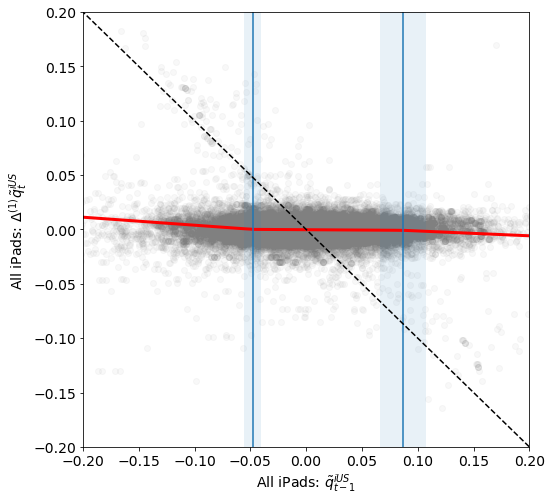

2
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Breakpoint values too close together 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Algorithm stopped as max iterations reached 
Run 6: Breakpoint values outside range 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Algorithm stopped as max iterations reached 
Run 9: Breakpoint values outside range 
Run 10: Algorithm stopped as max iterations reached 
Run 11: Breakpoint values outside range 

No convergence with n_boost = 10, try n_boost = 50

                    Breakpoint Regression Results                     
No. Observations                    42000
No. Model Parameters                    6
Degrees of Freedom                  41994
Res. Sum of Squares               17.7128
Total Sum of Squares               18.

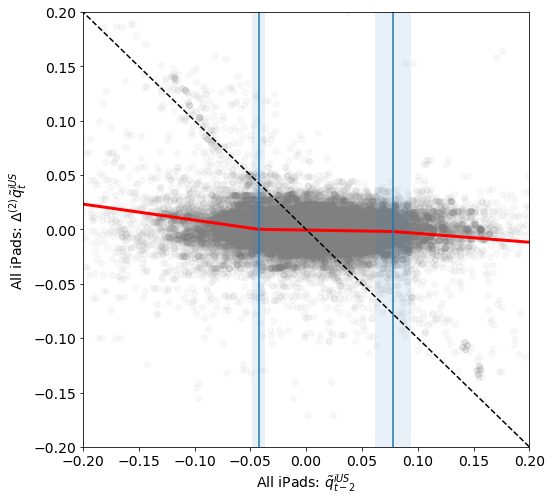

3
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Algorithm stopped as max iterations reached 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Algorithm stopped as max iterations reached 
Run 6: Breakpoint values outside range 
Run 7: Breakpoint values outside range 
Run 8: Algorithm stopped as max iterations reached 
Run 9: Algorithm stopped as max iterations reached 
Run 10: Algorithm stopped as max iterations reached 
Run 11: Algorithm stopped as max iterations reached 

No convergence with n_boost = 10, try n_boost = 50
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values too close together 
Run 2: Algorithm stopped as max iterations reached 
R

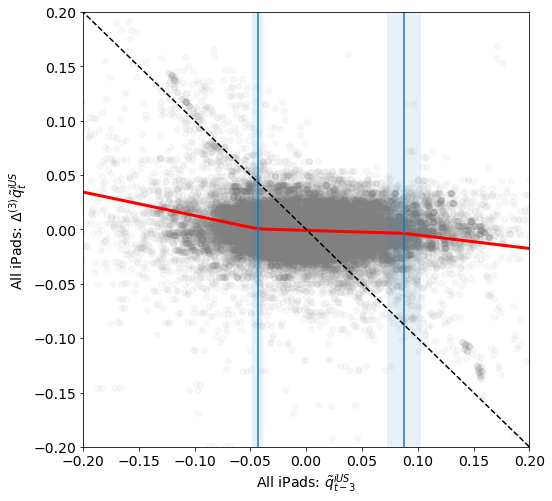

4
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values too close together 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Breakpoint values too close together 
Run 6: Algorithm stopped as max iterations reached 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Algorithm stopped as max iterations reached 
Run 9: Algorithm stopped as max iterations reached 
Run 10: Algorithm stopped as max iterations reached 
Run 11: Breakpoint values outside range 

No convergence with n_boost = 10, try n_boost = 50

                    Breakpoint Regression Results                     
No. Observations                    41720
No. Model Parameters                    6
Degrees of Freedom                  41714
Res. Sum of Squares               34.0686
Total Sum

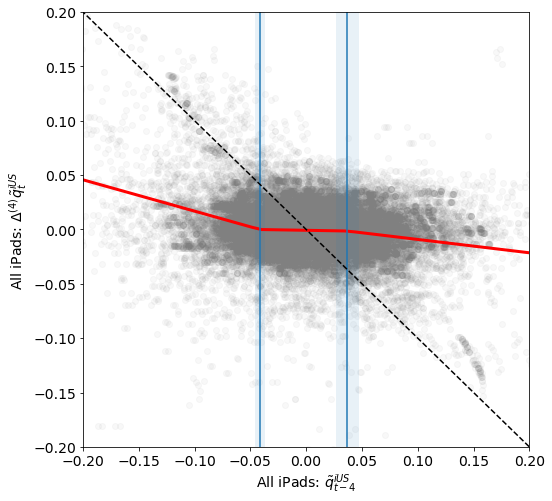

5
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Breakpoint values outside range 
Run 3: Breakpoint values outside range 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Algorithm stopped as max iterations reached 
Run 6: Breakpoint values outside range 
Run 7: Breakpoint values outside range 
Run 8: Breakpoint values outside range 
Run 9: Breakpoint values outside range 
Run 10: Algorithm stopped as max iterations reached 
Run 11: Algorithm stopped as max iterations reached 

No convergence with n_boost = 10, try n_boost = 50
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Breakpoint values too close together 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Algorithm stop

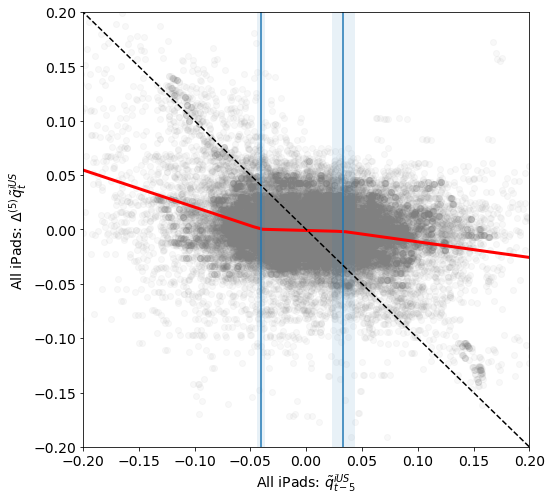

6
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Algorithm stopped as max iterations reached 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Breakpoint values too close together 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Algorithm stopped as max iterations reached 
Run 6: Algorithm stopped as max iterations reached 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Breakpoint values too close together 
Run 9: Algorithm stopped as max iterations reached 
Run 10: Algorithm stopped as max iterations reached 
Run 11: Breakpoint values outside range 

No convergence with n_boost = 10, try n_boost = 50

                    Breakpoint Regression Results                     
No. Observations                    41440
No. Model Parameters                    6
Degrees of Freedom                  41434
Res. Sum of Squares               47.8195
Total Sum

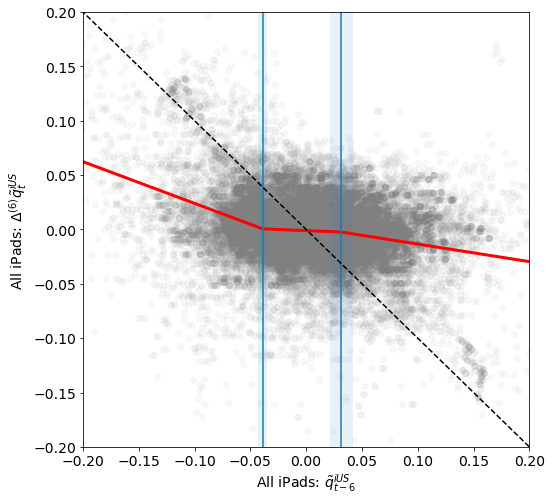

7
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Algorithm stopped as max iterations reached 
Run 2: Breakpoint values outside range 
Run 3: Breakpoint values outside range 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Algorithm stopped as max iterations reached 
Run 6: Algorithm stopped as max iterations reached 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Breakpoint values too close together 
Run 9: Algorithm stopped as max iterations reached 
Run 10: Breakpoint values outside range 
Run 11: Algorithm stopped as max iterations reached 

No convergence with n_boost = 10, try n_boost = 50
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Algorithm stopped as max iterations reached 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Algori

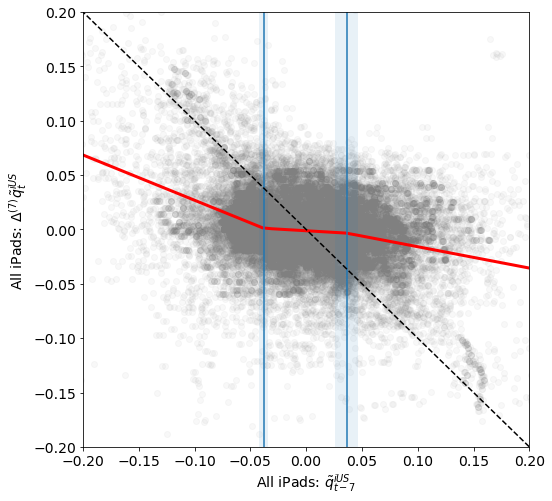

8
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Algorithm stopped as max iterations reached 
Run 2: Breakpoint values outside range 
Run 3: Breakpoint values too close together 
Run 4: Breakpoint values outside range 
Run 5: Breakpoint values too close together 
Run 6: Algorithm stopped as max iterations reached 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Breakpoint values outside range 
Run 9: Algorithm stopped as max iterations reached 
Run 10: Breakpoint values outside range 
Run 11: Breakpoint values too close together 

No convergence with n_boost = 10, try n_boost = 50
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values too close together 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Algorithm stopped as max iterations rea

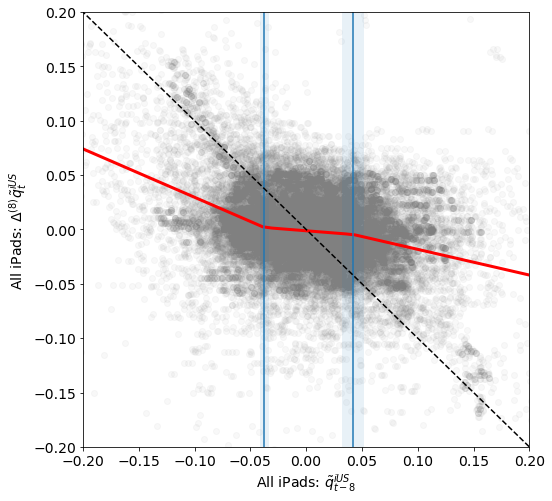

9
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Breakpoint values outside range 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Breakpoint values too close together 
Run 5: Breakpoint values outside range 
Run 6: Algorithm stopped as max iterations reached 
Run 7: Breakpoint values outside range 
Run 8: Breakpoint values outside range 
Run 9: Breakpoint values outside range 
Run 10: Breakpoint values outside range 
Run 11: Algorithm stopped as max iterations reached 

No convergence with n_boost = 10, try n_boost = 50

                    Breakpoint Regression Results                     
No. Observations                    41020
No. Model Parameters                    6
Degrees of Freedom                  41014
Res. Sum of Squares               65.8988
Total Sum of Squares              76.7527
R Squared                       

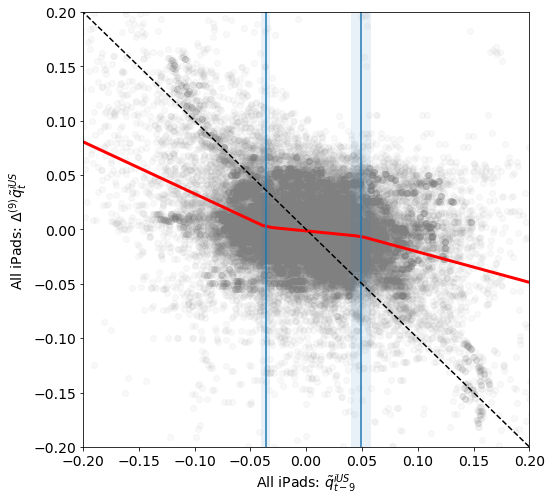

10
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Breakpoint values too close together 
Run 5: Algorithm stopped as max iterations reached 
Run 6: Breakpoint values outside range 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Algorithm stopped as max iterations reached 
Run 9: Algorithm stopped as max iterations reached 
Run 10: Algorithm stopped as max iterations reached 
Run 11: Algorithm stopped as max iterations reached 

No convergence with n_boost = 10, try n_boost = 50
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Break

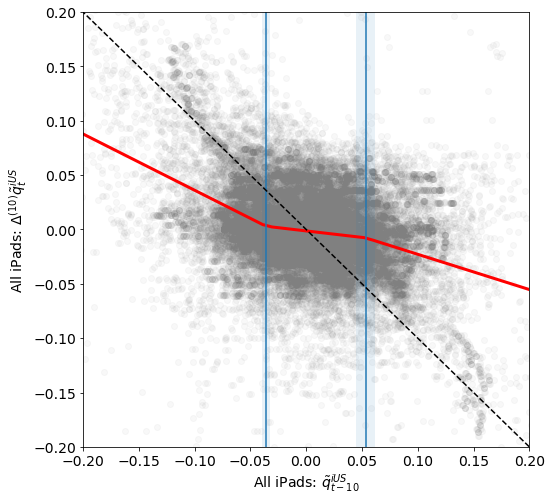

11
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Algorithm stopped as max iterations reached 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Breakpoint values too close together 
Run 5: Breakpoint values outside range 
Run 6: Breakpoint values outside range 
Run 7: Breakpoint values outside range 
Run 8: Breakpoint values outside range 
Run 9: Breakpoint values too close together 
Run 10: Breakpoint values outside range 
Run 11: Breakpoint values outside range 

No convergence with n_boost = 10, try n_boost = 50
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Breakpoint values outside range 
Run 4: Algorithm stopped as

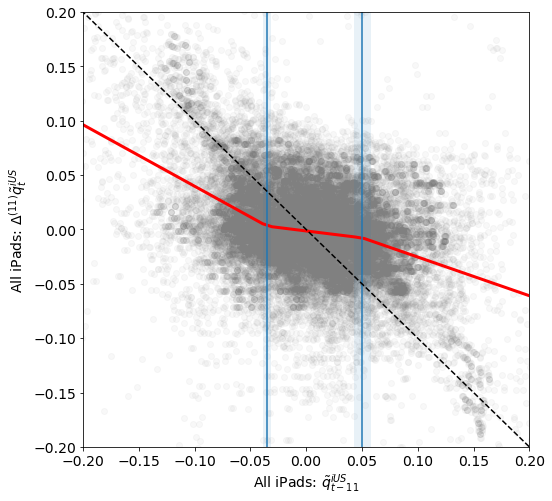

12
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Algorithm stopped as max iterations reached 
Run 6: Algorithm stopped as max iterations reached 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Breakpoint values outside range 
Run 9: Breakpoint values outside range 
Run 10: Breakpoint values outside range 
Run 11: Algorithm stopped as max iterations reached 

No convergence with n_boost = 10, try n_boost = 50

                    Breakpoint Regression Results                     
No. Observations                    40600
No. Model Parameters                    6
Degrees of Freedom                  40594
Res. Sum of Squares               82.3831
Total Sum of Squares          

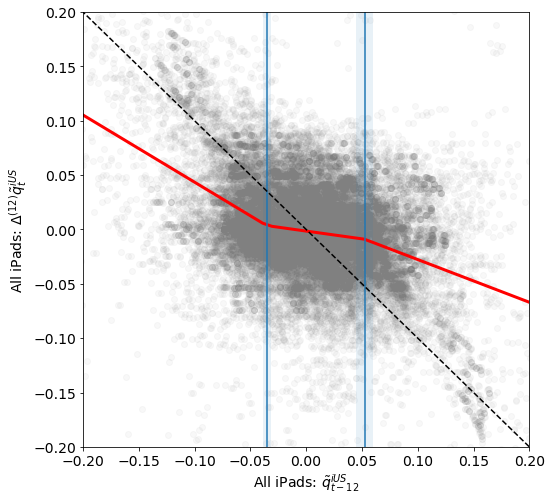

13

                    Breakpoint Regression Results                     
No. Observations                    40460
No. Model Parameters                    6
Degrees of Freedom                  40454
Res. Sum of Squares               87.1722
Total Sum of Squares              109.442
R Squared                        0.203484
Adjusted R Squared               0.203366
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             -0.0195321      0.00093      -20.993      2.54e-97    -0.021356    -0.017708
alpha1             -0.667129       0.0113      -58.833           0.0     -0.68935      -0.6449
beta1               0.516394       0.0174       29.732             -      0.48235      0.55044
beta2              -0.274783        0.018      -15.293             -        -0.31     -0.23957
breakpoint1   

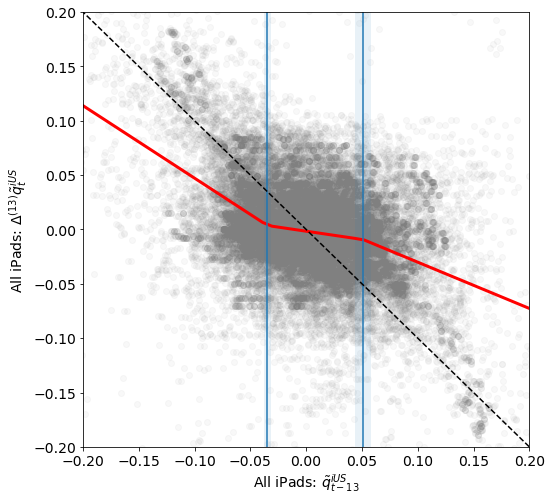

14
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Breakpoint values outside range 
Run 3: Breakpoint values outside range 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Breakpoint values outside range 
Run 6: Breakpoint values outside range 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Breakpoint values outside range 
Run 9: Algorithm stopped as max iterations reached 
Run 10: Breakpoint values outside range 
Run 11: Algorithm stopped as max iterations reached 

No convergence with n_boost = 10, try n_boost = 50
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Algorithm stopped as max iterations reached 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Breakpoint values outside range 
Run 4: Breakp


                    Breakpoint Regression Results                     
No. Observations                    40320
No. Model Parameters                    6
Degrees of Freedom                  40314
Res. Sum of Squares               91.4226
Total Sum of Squares              117.009
R Squared                        0.218669
Adjusted R Squared               0.218552
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             -0.0205962     0.000944      -21.829     5.06e-105    -0.022446    -0.018747
alpha1             -0.713009       0.0116      -61.521           0.0     -0.73572     -0.69029
beta1               0.559591        0.018       31.151             -      0.52438       0.5948
beta2              -0.299481       0.0186      -16.103             -     -0.33593     -0.26303
breakpoint1      

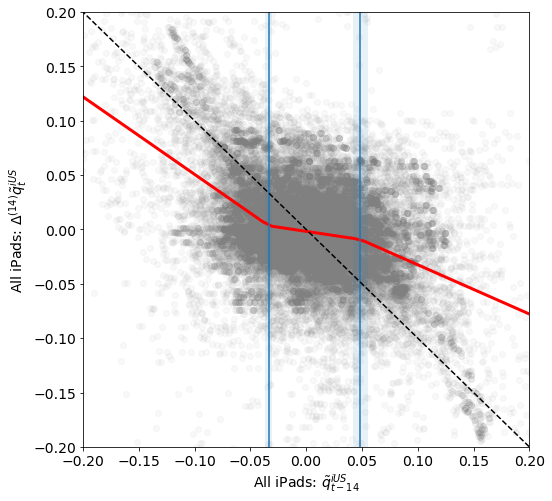

15

                    Breakpoint Regression Results                     
No. Observations                    40180
No. Model Parameters                    6
Degrees of Freedom                  40174
Res. Sum of Squares               95.2271
Total Sum of Squares              124.396
R Squared                        0.234484
Adjusted R Squared               0.234370
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             -0.0217147     0.000942      -23.057     7.24e-117    -0.023561    -0.019869
alpha1             -0.762079       0.0117      -64.946           0.0     -0.78508     -0.73908
beta1               0.602723       0.0188       31.981             -      0.56578      0.63966
beta2              -0.320003       0.0194      -16.476             -     -0.35807     -0.28194
breakpoint1   

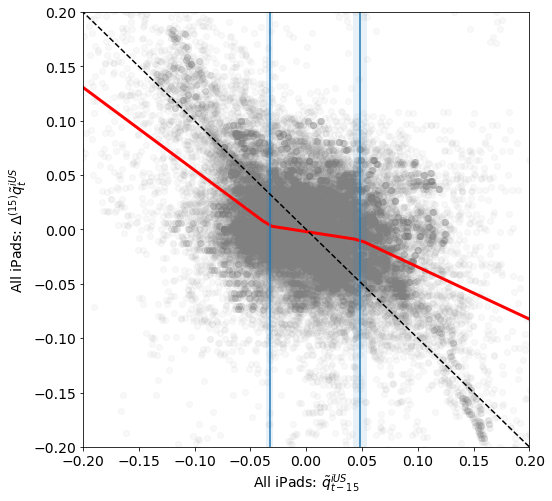

16
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Breakpoint values outside range 
Run 3: Breakpoint values outside range 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Algorithm stopped as max iterations reached 
Run 6: Breakpoint values outside range 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Breakpoint values outside range 
Run 9: Breakpoint values outside range 
Run 10: Breakpoint values outside range 
Run 11: Algorithm stopped as max iterations reached 

No convergence with n_boost = 10, try n_boost = 50

                    Breakpoint Regression Results                     
No. Observations                    40040
No. Model Parameters                    6
Degrees of Freedom                  40034
Res. Sum of Squares               98.7809
Total Sum of Squares                132.0
R Squared               

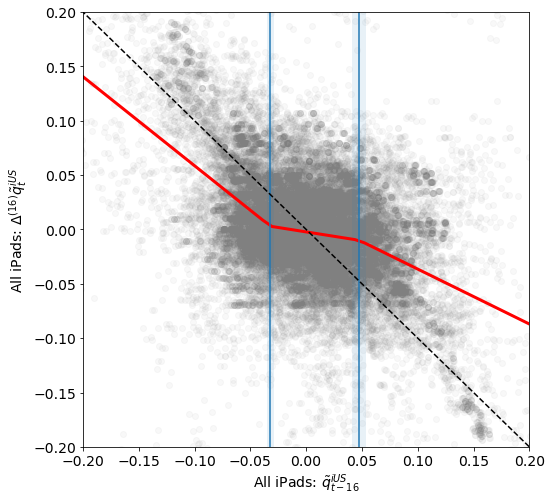

17
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Breakpoint values outside range 
Run 4: Breakpoint values too close together 
Run 5: Breakpoint values outside range 
Run 6: Breakpoint values outside range 
Run 7: Breakpoint values outside range 
Run 8: Algorithm stopped as max iterations reached 
Run 9: Breakpoint values too close together 
Run 10: Breakpoint values outside range 
Run 11: Breakpoint values outside range 

No convergence with n_boost = 10, try n_boost = 50
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Breakpoint values outside range 
Run 3: Breakpoint values outside range 
Run 4: Breakpoint values outside range 
Run 5: Algo


                    Breakpoint Regression Results                     
No. Observations                    39900
No. Model Parameters                    6
Degrees of Freedom                  39894
Res. Sum of Squares               101.888
Total Sum of Squares              139.156
R Squared                        0.267813
Adjusted R Squared               0.267703
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             -0.0249232     0.000965      -25.822     7.88e-146    -0.026815    -0.023031
alpha1             -0.873328       0.0121      -72.038           0.0     -0.89709     -0.84957
beta1               0.704445       0.0199        35.36             -       0.6654      0.74349
beta2              -0.362558       0.0205      -17.677             -     -0.40276     -0.32236
breakpoint1      

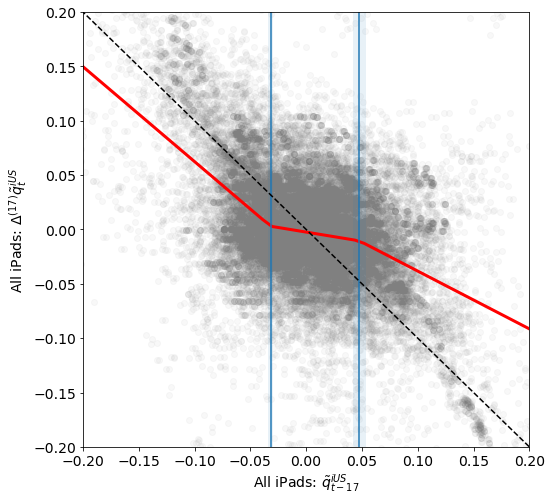

18

                    Breakpoint Regression Results                     
No. Observations                    39760
No. Model Parameters                    6
Degrees of Freedom                  39754
Res. Sum of Squares               104.723
Total Sum of Squares              145.818
R Squared                        0.281824
Adjusted R Squared               0.281715
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             -0.0259296     0.000978      -26.513     1.51e-153    -0.027847    -0.024013
alpha1             -0.917195       0.0123      -74.576           0.0      -0.9413     -0.89309
beta1               0.735663       0.0202       36.455             -      0.69611      0.77522
beta2              -0.370946       0.0209      -17.782             -     -0.41183     -0.33006
breakpoint1   

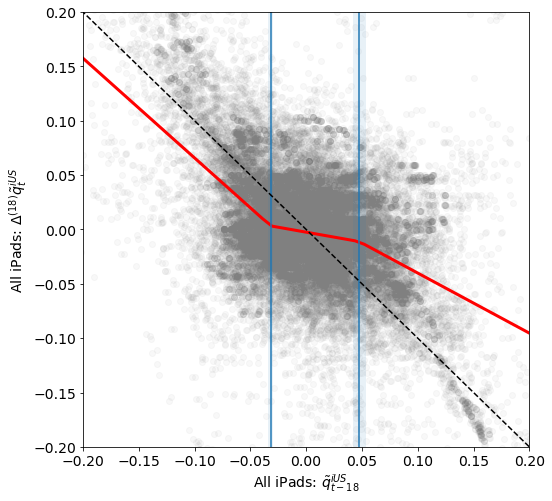

19

                    Breakpoint Regression Results                     
No. Observations                    39620
No. Model Parameters                    6
Degrees of Freedom                  39614
Res. Sum of Squares               107.402
Total Sum of Squares              152.119
R Squared                        0.293962
Adjusted R Squared               0.293855
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             -0.0262685     0.000989      -26.565     3.87e-154    -0.028207     -0.02433
alpha1             -0.950449       0.0125      -76.299           0.0     -0.97486     -0.92603
beta1                0.74846       0.0204       36.642             -      0.70842       0.7885
beta2              -0.367911       0.0212      -17.351             -     -0.40947     -0.32635
breakpoint1   

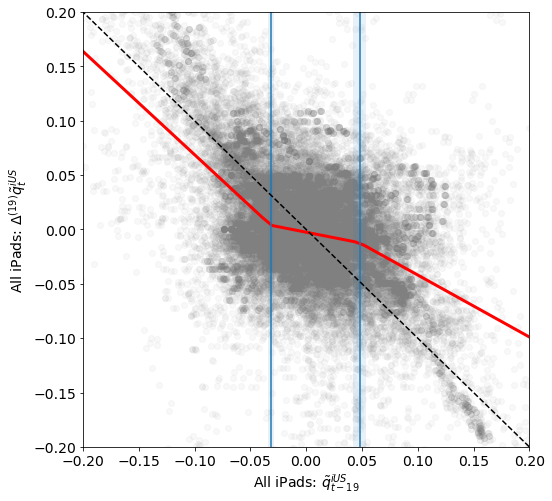

20

                    Breakpoint Regression Results                     
No. Observations                    39480
No. Model Parameters                    6
Degrees of Freedom                  39474
Res. Sum of Squares               109.987
Total Sum of Squares               158.35
R Squared                        0.305421
Adjusted R Squared               0.305315
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             -0.0262322     0.000997      -26.315     2.62e-151    -0.028186    -0.024278
alpha1             -0.978306       0.0126      -77.674           0.0       -1.003     -0.95362
beta1               0.751758       0.0206       36.435             -      0.71132       0.7922
beta2               -0.36217       0.0215      -16.815             -     -0.40439     -0.31995
breakpoint1   

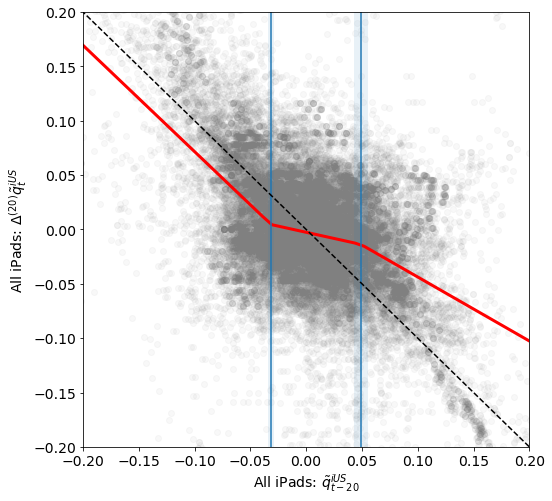

21

                    Breakpoint Regression Results                     
No. Observations                    39340
No. Model Parameters                    6
Degrees of Freedom                  39334
Res. Sum of Squares                112.28
Total Sum of Squares              164.348
R Squared                        0.316817
Adjusted R Squared               0.316713
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             -0.0259936     0.000981      -26.488     2.95e-153    -0.027917     -0.02407
alpha1               -1.0043       0.0126      -79.819           0.0       -1.029     -0.97964
beta1               0.763655       0.0215       35.522             -      0.72152      0.80579
beta2              -0.358508       0.0224      -16.025             -     -0.40236     -0.31466
breakpoint1   

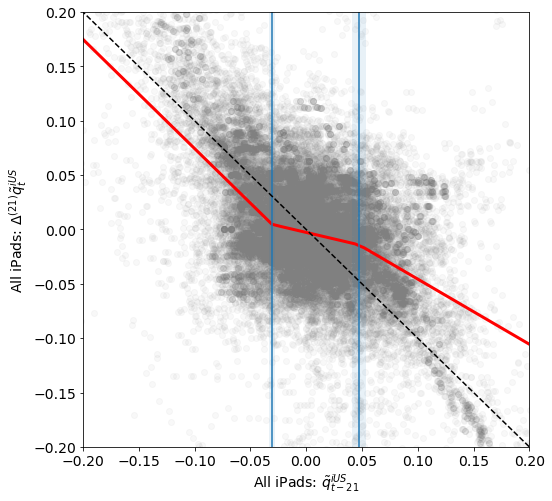

22

                    Breakpoint Regression Results                     
No. Observations                    39200
No. Model Parameters                    6
Degrees of Freedom                  39194
Res. Sum of Squares               114.422
Total Sum of Squares              170.061
R Squared                        0.327168
Adjusted R Squared               0.327065
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             -0.0257357     0.000981       -26.24     1.88e-150    -0.027658    -0.023813
alpha1              -1.02809       0.0127      -81.248           0.0      -1.0529      -1.0033
beta1               0.787365       0.0237       33.271             -      0.74098      0.83375
beta2              -0.353181        0.024      -14.697             -     -0.40028     -0.30608
breakpoint1   

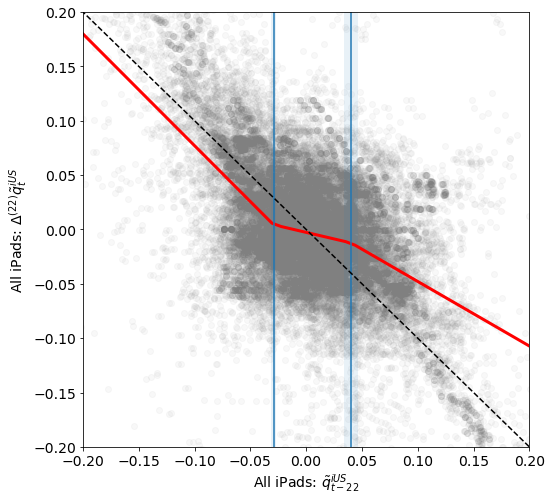

23
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Algorithm stopped as max iterations reached 
Run 2: Breakpoint values outside range 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Breakpoint values outside range 
Run 6: Breakpoint values outside range 
Run 7: Breakpoint values outside range 
Run 8: Algorithm stopped as max iterations reached 
Run 9: Breakpoint values outside range 
Run 10: Breakpoint values outside range 
Run 11: Algorithm stopped as max iterations reached 

No convergence with n_boost = 10, try n_boost = 50

                    Breakpoint Regression Results                     
No. Observations                    39060
No. Model Parameters                    6
Degrees of Freedom                  39054
Res. Sum of Squares               116.499
Total Sum of Squares              175.539
R Squared   

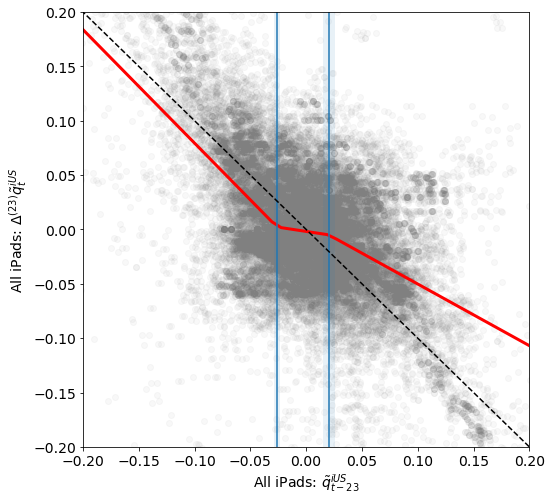

24
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Algorithm stopped as max iterations reached 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Breakpoint values outside range 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Breakpoint values outside range 
Run 6: Breakpoint values outside range 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Breakpoint values outside range 
Run 9: Breakpoint values outside range 
Run 10: Breakpoint values outside range 
Run 11: Breakpoint values outside range 

No convergence with n_boost = 10, try n_boost = 50
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Algorithm stopped as max iterations reached 
Run 2: Breakpoint values outside range 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Breakp

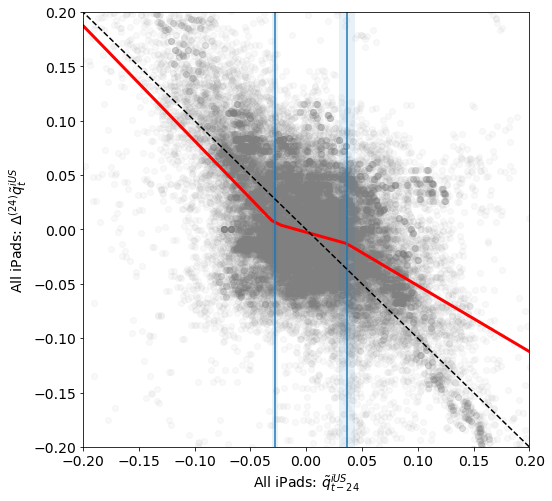

25

                    Breakpoint Regression Results                     
No. Observations                    38780
No. Model Parameters                    6
Degrees of Freedom                  38774
Res. Sum of Squares               120.286
Total Sum of Squares              186.184
R Squared                        0.353939
Adjusted R Squared               0.353839
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             -0.0230195     0.000906      -25.416     2.44e-141    -0.024795    -0.021244
alpha1              -1.06636       0.0124      -86.155           0.0      -1.0906      -1.0421
beta1               0.924166       0.0502        18.41             -      0.82577       1.0226
beta2               -0.44548       0.0498      -8.9455             -     -0.54309     -0.34787
breakpoint1   

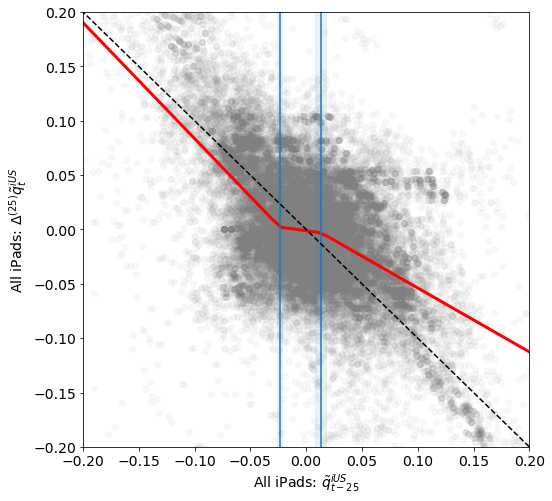

26
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values too close together 
Run 2: Algorithm stopped as max iterations reached 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Breakpoint values outside range 
Run 5: Breakpoint values outside range 
Run 6: Breakpoint values outside range 
Run 7: Breakpoint values outside range 
Run 8: Algorithm stopped as max iterations reached 
Run 9: Breakpoint values outside range 
Run 10: Breakpoint values outside range 
Run 11: Breakpoint values outside range 

No convergence with n_boost = 10, try n_boost = 50

                    Breakpoint Regression Results                     
No. Observations                    38640
No. Model Parameters                    6
Degrees of Freedom                  38634
Res. Sum of Squares               120.766
Total Sum of Squares              191.778
R Squared                      

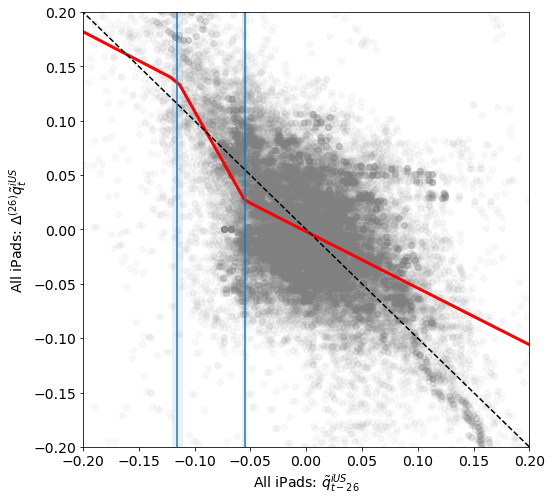

27
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Breakpoint values outside range 
Run 3: Breakpoint values outside range 
Run 4: Breakpoint values outside range 
Run 5: Breakpoint values outside range 
Run 6: Breakpoint values outside range 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Breakpoint values outside range 
Run 9: Algorithm stopped as max iterations reached 
Run 10: Algorithm stopped as max iterations reached 
Run 11: Breakpoint values outside range 

No convergence with n_boost = 10, try n_boost = 50

                    Breakpoint Regression Results                     
No. Observations                    38500
No. Model Parameters                    6
Degrees of Freedom                  38494
Res. Sum of Squares               122.435
Total Sum of Squares              197.866
R Squared                        0.3

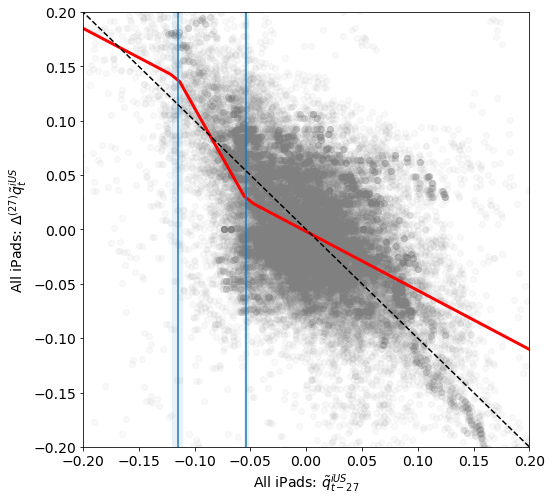

28
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Breakpoint values outside range 
Run 3: Breakpoint values outside range 
Run 4: Algorithm stopped as max iterations reached 
Run 5: Breakpoint values outside range 
Run 6: Breakpoint values outside range 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Breakpoint values outside range 
Run 9: Breakpoint values too close together 
Run 10: Breakpoint values outside range 
Run 11: Breakpoint values outside range 

No convergence with n_boost = 10, try n_boost = 50

                    Breakpoint Regression Results                     
No. Observations                    38360
No. Model Parameters                    6
Degrees of Freedom                  38354
Res. Sum of Squares               125.705
Total Sum of Squares              203.488
R Squared                        0.382249
A

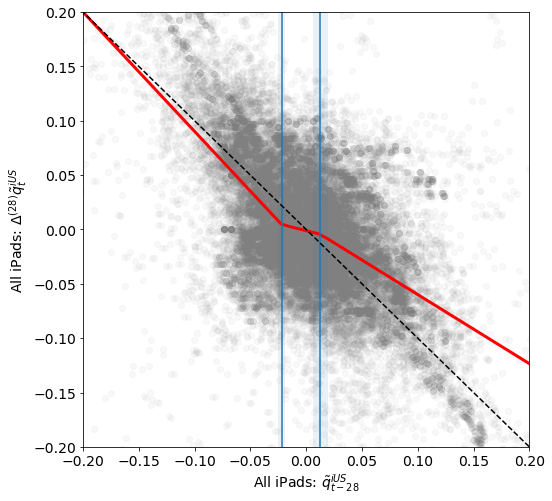

29
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Breakpoint values too close together 
Run 3: Breakpoint values outside range 
Run 4: Breakpoint values outside range 
Run 5: Breakpoint values outside range 
Run 6: Algorithm stopped as max iterations reached 
Run 7: Algorithm stopped as max iterations reached 
Run 8: Breakpoint values outside range 
Run 9: Breakpoint values outside range 
Run 10: Breakpoint values outside range 
Run 11: Breakpoint values outside range 

No convergence with n_boost = 10, try n_boost = 50

                    Breakpoint Regression Results                     
No. Observations                    38220
No. Model Parameters                    6
Degrees of Freedom                  38214
Res. Sum of Squares               125.249
Total Sum of Squares              208.418
R Squared                        0.399050
A

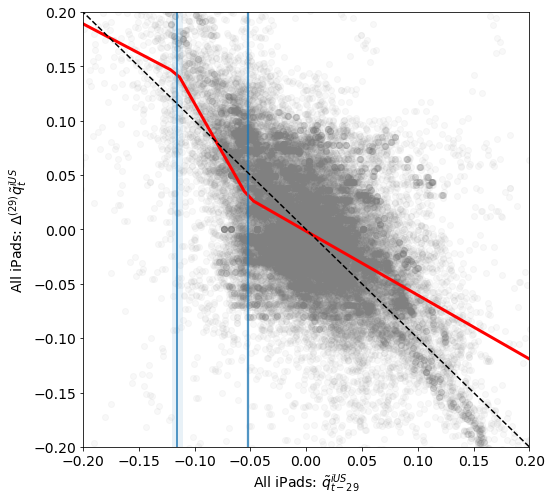

30
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Breakpoint values outside range 
Run 3: Algorithm stopped as max iterations reached 
Run 4: Breakpoint values outside range 
Run 5: Breakpoint values outside range 
Run 6: Breakpoint values outside range 
Run 7: Breakpoint values outside range 
Run 8: Breakpoint values outside range 
Run 9: Breakpoint values outside range 
Run 10: Breakpoint values outside range 
Run 11: Algorithm stopped as max iterations reached 

No convergence with n_boost = 10, try n_boost = 50
Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Breakpoint values outside range 
Run 2: Breakpoint values too close together 
Run 3: Breakpoint values outside range 
Run 4: Breakpoint values outside range 
Run 5: Breakpoin

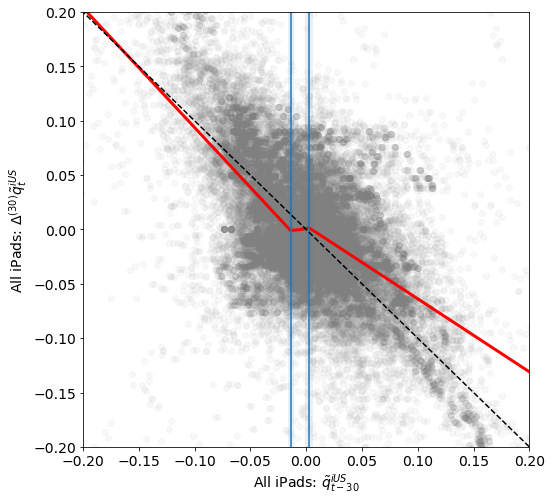

In [19]:
dictresults = {}
dictsummary = {}

for num in range(1,31):
    print(num)

    d = num

    xall = []
    yall = []
    xallt = []
    yallt = []

    figname = r'figpiecewise'+str(d)+'.png'

    dfbases = dfbases.dropna()

    for product in ['qplUSadj','qpsUSadj','qipUSadj','qimUSadj']:
        x=dfbases.unstack(0).shift(d).stack(1).sort_values('Country')[product].tolist()
        y=dfbases.unstack(0).diff(periods=d).stack(1).sort_values('Country')[product]
        xall.append(x)
        yall.append(y)

    for i in range(0,4):
        for j in range(0,len(xall[i])):
            xallt.append(xall[i][j])
            yallt.append(yall[i][j])

    pw_fit = piecewise_regression.Fit(np.array(xallt), np.array(yallt), n_breakpoints=2, n_boot=10)
    #pw_fit.summary()
   
    dictresults[d] = pw_fit.get_results()
    dictsummary[d] = pw_fit.summary()

    if dictresults[d]['converged'] == False:
        print('No convergence with n_boost = 10, try n_boost = 50')
        pw_fit = piecewise_regression.Fit(np.array(xallt), np.array(yallt), n_breakpoints=2, n_boot=50)
        dictresults[d] = pw_fit.get_results()
        dictsummary[d] = pw_fit.summary()
        
    if dictresults[d]['converged'] == False:
        print('No convergence with n_boost = 50, try n_boost = 100')
        pw_fit = piecewise_regression.Fit(np.array(xallt), np.array(yallt), n_breakpoints=2, n_boot=100)
        dictresults[d] = pw_fit.get_results()
        dictsummary[d] = pw_fit.summary()
        
    if dictresults[d]['converged'] == False:
        print('No convergence with n_boost = 100, try n_boost = 200')
        pw_fit = piecewise_regression.Fit(np.array(xallt), np.array(yallt), n_breakpoints=2, n_boot=200)
        dictresults[d] = pw_fit.get_results()
        dictsummary[d] = pw_fit.summary()
        
    if dictresults[d]['converged'] == False:
        print('No convergence with n_boost = 200, try n_boost = 300')
        pw_fit = piecewise_regression.Fit(np.array(xallt), np.array(yallt), n_breakpoints=2, n_boot=300)
        dictresults[d] = pw_fit.get_results()
        dictsummary[d] = pw_fit.summary()
    
    if dictresults[d]['converged'] == False:
        print('No convergence with n_boost = 300, try n_boost = 1,000')
        pw_fit = piecewise_regression.Fit(np.array(xallt), np.array(yallt), n_breakpoints=2, n_boot=1000)
        dictresults[d] = pw_fit.get_results()
        dictsummary[d] = pw_fit.summary()

    if dictresults[d]['converged'] == False:
        print('No convergence with n_boost = 1,000, try n_boost = 2,000')
        pw_fit = piecewise_regression.Fit(np.array(xallt), np.array(yallt), n_breakpoints=2, n_boot=2000)
        dictresults[d] = pw_fit.get_results()
        dictsummary[d] = pw_fit.summary()
        
    if dictresults[d]['converged'] == False:
        print('No convergence with n_boost = 2,000, try n_boost = 10,000')
        pw_fit = piecewise_regression.Fit(np.array(xallt), np.array(yallt), n_breakpoints=2, n_boot=10000)
        dictresults[d] = pw_fit.get_results()
        dictsummary[d] = pw_fit.summary()
    
    figname = r'figpiecewise'+str(d)+'.png'

    # Plot figure
    plt.figure(figsize=(8,8))
    # Plot the data, fit, breakpoints and confidence intervals
    pw_fit.plot_data(color='grey', alpha=.05, lw=1)
    # Pass in standard matplotlib keywords to control any of the plots
    pw_fit.plot_fit(color="red", linewidth=3)
    pw_fit.plot_breakpoints()
    pw_fit.plot_breakpoint_confidence_intervals()

    plt.xlabel(r'All iPads: $\tilde{q}_{t-'+str(d)+'}^{iUS}$',size=14)
    plt.ylabel(r'All iPads: $\Delta^{('+str(d)+')}'+r'\tilde{q}_{t}^{iUS}$',size=14)
    plt.plot([-0.3, 0.3], [0.3, -0.3], color='black', linestyle='dashed')
    plt.xlim(-0.2,0.2)
    plt.ylim(-0.2,0.2)
    plt.tick_params(labelsize=14)
    plt.savefig(figname,transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()

In [20]:
print(dictsummary[1])


                    Breakpoint Regression Results                     
No. Observations                    42140
No. Model Parameters                    6
Degrees of Freedom                  42134
Res. Sum of Squares               8.27471
Total Sum of Squares              8.44146
R Squared                        0.019753
Adjusted R Squared               0.019614
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const            -0.00343269      0.00035      -9.7987      1.21e-22   -0.0041193   -0.0027461
alpha1            -0.0735384      0.00368       -19.97      2.58e-88    -0.080756    -0.066321
beta1              0.0671208      0.00436       15.411             -     0.058584     0.075657
beta2             -0.0381285      0.00546      -6.9827             -    -0.048831    -0.027426
breakpoint1      

In [21]:
deltad = []
breakpoint1 = []
breakpoint1se = []
breakpoint1c025 = []
breakpoint1c975 = []
breakpoint2 = []
breakpoint2se = []
breakpoint2c025 = []
breakpoint2c975 = []

alpha1 = []
alpha1se = []
alpha1c025 = []
alpha1c975 = []
alpha2 = []
alpha2se = []
alpha2c025 = []
alpha2c975 = []
alpha3 = []
alpha3se = []
alpha3c025 = []
alpha3c975 = []

for x in range(1,31):
    print(x)
    deltad.append(x)
    breakpoint1.append(dictresults[x]['estimates']['breakpoint1']['estimate'])
    breakpoint1se.append(dictresults[x]['estimates']['breakpoint1']['se'])
    breakpoint1c025.append(dictresults[x]['estimates']['breakpoint1']['confidence_interval'][0])
    breakpoint1c975.append(dictresults[x]['estimates']['breakpoint1']['confidence_interval'][1])
    breakpoint2.append(dictresults[x]['estimates']['breakpoint2']['estimate'])
    breakpoint2se.append(dictresults[x]['estimates']['breakpoint2']['se'])
    breakpoint2c025.append(dictresults[x]['estimates']['breakpoint2']['confidence_interval'][0])
    breakpoint2c975.append(dictresults[x]['estimates']['breakpoint2']['confidence_interval'][1])
    
    alpha1.append(dictresults[x]['estimates']['alpha1']['estimate'])
    alpha1se.append(dictresults[x]['estimates']['alpha1']['se'])
    alpha1c025.append(dictresults[x]['estimates']['alpha1']['confidence_interval'][0])
    alpha1c975.append(dictresults[x]['estimates']['alpha1']['confidence_interval'][1])
    
    alpha2.append(dictresults[x]['estimates']['alpha2']['estimate'])
    alpha2se.append(dictresults[x]['estimates']['alpha2']['se'])
    alpha2c025.append(dictresults[x]['estimates']['alpha2']['confidence_interval'][0])
    alpha2c975.append(dictresults[x]['estimates']['alpha2']['confidence_interval'][1])
    
    alpha3.append(dictresults[x]['estimates']['alpha3']['estimate'])
    alpha3se.append(dictresults[x]['estimates']['alpha3']['se'])
    alpha3c025.append(dictresults[x]['estimates']['alpha3']['confidence_interval'][0])
    alpha3c975.append(dictresults[x]['estimates']['alpha3']['confidence_interval'][1])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [22]:
piecewiseoutputdf = pd.DataFrame({'delta':deltad,
        'breakpoint1':breakpoint1,'breakpoint1se':breakpoint1se,'breakpoint1c025':breakpoint1c975,'breakpoint1c975':breakpoint1c025,
        'breakpoint2':breakpoint2,'breakpoint2se':breakpoint2se,'breakpoint2c025':breakpoint2c975,'breakpoint2c975':breakpoint2c025,
        'alpha1':alpha1,'alpha1se':alpha1se,'alpha1c025':alpha1c025,'alpha1c975':alpha1c975,
        'alpha2':alpha2,'alpha2se':alpha2se,'alpha2c025':alpha2c025,'alpha2c975':alpha2c975,
        'alpha3':alpha3,'alpha3se':alpha3se,'alpha3c025':alpha3c025,'alpha3c975':alpha3c975},
                                 index=deltad)

In [23]:
piecewiseoutputdf.to_csv('dfpiecewiseoutputdf.csv', index=True)
piecewiseoutputdf

delta  breakpoint1  breakpoint1se  breakpoint1c025  breakpoint1c975  \
1       1    -0.047801       0.003936        -0.040086        -0.055515   
2       2    -0.042476       0.002871        -0.036849        -0.048103   
3       3    -0.043443       0.002453        -0.038635        -0.048251   
4       4    -0.041336       0.002082        -0.037256        -0.045417   
5       5    -0.040463       0.001985        -0.036573        -0.044354   
6       6    -0.038909       0.001989        -0.035010        -0.042808   
7       7    -0.038096       0.001997        -0.034181        -0.042010   
8       8    -0.037591       0.002025        -0.033623        -0.041559   
9       9    -0.036136       0.002001        -0.032215        -0.040058   
10     10    -0.035916       0.001958        -0.032077        -0.039754   
11     11    -0.035064       0.001857        -0.031425        -0.038703   
12     12    -0.035394       0.001774        -0.031918        -0.038871   
13     13    -0.034702       0.001687        -0.031395        -0.038009   
14     14    -0.033694       0.001594        -0.030569        -0.036819   
15     15    -0.032761       0.001517        -0.029788        -0.035734   
16     16    -0.032026       0.001419        -0.029245        -0.034807   
17     17    -0.031946       0.001349        -0.029301        -0.034591   
18     18    -0.031849       0.001311        -0.029279        -0.034419   
19     19    -0.031714       0.001306        -0.029154        -0.034274   
20     20    -0.031426       0.001315        -0.028848        -0.034004   
21     21    -0.030475       0.001316        -0.027895        -0.033054   
22     22    -0.029271       0.001315        -0.026694        -0.031848   
23     23    -0.026112       0.001315        -0.023534        -0.028690   
24     24    -0.028310       0.001395        -0.025577        -0.031044   
25     25    -0.023611       0.001364        -0.020937        -0.026285   
26     26    -0.115316       0.002597        -0.110225        -0.120407   
27     27    -0.115158       0.002600        -0.110062        -0.120254   
28     28    -0.021938       0.001607        -0.018787        -0.025088   
29     29    -0.115312       0.002650        -0.110117        -0.120507   
30     30    -0.013255       0.001333        -0.010643        -0.015867   

    breakpoint2  breakpoint2se  breakpoint2c025  breakpoint2c975    alpha1  \
1      0.086727       0.010522         0.107351         0.066103 -0.073538   
2      0.077711       0.008149         0.093683         0.061739 -0.147224   
3      0.087894       0.007691         0.102968         0.072820 -0.216541   
4      0.036754       0.005205         0.046955         0.026552 -0.288241   
5      0.033439       0.005157         0.043548         0.023330 -0.341494   
6      0.031484       0.005376         0.042021         0.020947 -0.383714   
7      0.036228       0.005158         0.046339         0.026118 -0.416436   
8      0.042211       0.004929         0.051872         0.032549 -0.444825   
9      0.049007       0.004704         0.058226         0.039788 -0.478085   
10     0.053176       0.004397         0.061793         0.044558 -0.517621   
11     0.050424       0.004040         0.058342         0.042506 -0.565661   
12     0.052301       0.003888         0.059922         0.044681 -0.618077   
13     0.051191       0.003625         0.058297         0.044086 -0.667129   
14     0.048546       0.003406         0.055222         0.041870 -0.713009   
15     0.048137       0.003252         0.054512         0.041763 -0.762079   
16     0.047510       0.003101         0.053587         0.041432 -0.819110   
17     0.047601       0.002992         0.053465         0.041737 -0.873328   
18     0.047551       0.002984         0.053400         0.041702 -0.917195   
19     0.047831       0.003070         0.053847         0.041814 -0.950449   
20     0.048969       0.003190         0.055221         0.042717 -0.978306   
21     0.047322       0.003257         0

In [25]:
piecewiseoutputdf.drop(26, inplace=True)
piecewiseoutputdf.drop(27, inplace=True)
piecewiseoutputdf.drop(29, inplace=True)
piecewiseoutputdf

delta  breakpoint1  breakpoint1se  breakpoint1c025  breakpoint1c975  \
1       1    -0.047801       0.003936        -0.040086        -0.055515   
2       2    -0.042476       0.002871        -0.036849        -0.048103   
3       3    -0.043443       0.002453        -0.038635        -0.048251   
4       4    -0.041336       0.002082        -0.037256        -0.045417   
5       5    -0.040463       0.001985        -0.036573        -0.044354   
6       6    -0.038909       0.001989        -0.035010        -0.042808   
7       7    -0.038096       0.001997        -0.034181        -0.042010   
8       8    -0.037591       0.002025        -0.033623        -0.041559   
9       9    -0.036136       0.002001        -0.032215        -0.040058   
10     10    -0.035916       0.001958        -0.032077        -0.039754   
11     11    -0.035064       0.001857        -0.031425        -0.038703   
12     12    -0.035394       0.001774        -0.031918        -0.038871   
13     13    -0.034702       0.001687        -0.031395        -0.038009   
14     14    -0.033694       0.001594        -0.030569        -0.036819   
15     15    -0.032761       0.001517        -0.029788        -0.035734   
16     16    -0.032026       0.001419        -0.029245        -0.034807   
17     17    -0.031946       0.001349        -0.029301        -0.034591   
18     18    -0.031849       0.001311        -0.029279        -0.034419   
19     19    -0.031714       0.001306        -0.029154        -0.034274   
20     20    -0.031426       0.001315        -0.028848        -0.034004   
21     21    -0.030475       0.001316        -0.027895        -0.033054   
22     22    -0.029271       0.001315        -0.026694        -0.031848   
23     23    -0.026112       0.001315        -0.023534        -0.028690   
24     24    -0.028310       0.001395        -0.025577        -0.031044   
25     25    -0.023611       0.001364        -0.020937        -0.026285   
28     28    -0.021938       0.001607        -0.018787        -0.025088   
30     30    -0.013255       0.001333        -0.010643        -0.015867   

    breakpoint2  breakpoint2se  breakpoint2c025  breakpoint2c975    alpha1  \
1      0.086727       0.010522         0.107351         0.066103 -0.073538   
2      0.077711       0.008149         0.093683         0.061739 -0.147224   
3      0.087894       0.007691         0.102968         0.072820 -0.216541   
4      0.036754       0.005205         0.046955         0.026552 -0.288241   
5      0.033439       0.005157         0.043548         0.023330 -0.341494   
6      0.031484       0.005376         0.042021         0.020947 -0.383714   
7      0.036228       0.005158         0.046339         0.026118 -0.416436   
8      0.042211       0.004929         0.051872         0.032549 -0.444825   
9      0.049007       0.004704         0.058226         0.039788 -0.478085   
10     0.053176       0.004397         0.061793         0.044558 -0.517621   
11     0.050424       0.004040         0.058342         0.042506 -0.565661   
12     0.052301       0.003888         0.059922         0.044681 -0.618077   
13     0.051191       0.003625         0.058297         0.044086 -0.667129   
14     0.048546       0.003406         0.055222         0.041870 -0.713009   
15     0.048137       0.003252         0.054512         0.041763 -0.762079   
16     0.047510       0.003101         0.053587         0.041432 -0.819110   
17     0.047601       0.002992         0.053465         0.041737 -0.873328   
18     0.047551       0.002984         0.053400         0.041702 -0.917195   
19     0.047831       0.003070         0.053847         0.041814 -0.950449   
20     0.048969       0.003190         0.055221         0.042717 -0.978306   
21     0.047322       0.003257         0.053705         0.040939 -1.004305   
22     0.040315       0.003249         0.046683         0.033947 -1.028090   
23     0.020257       0.002801         0.025748         0.014766 -1.044166   
24     0.036235       0.003652 

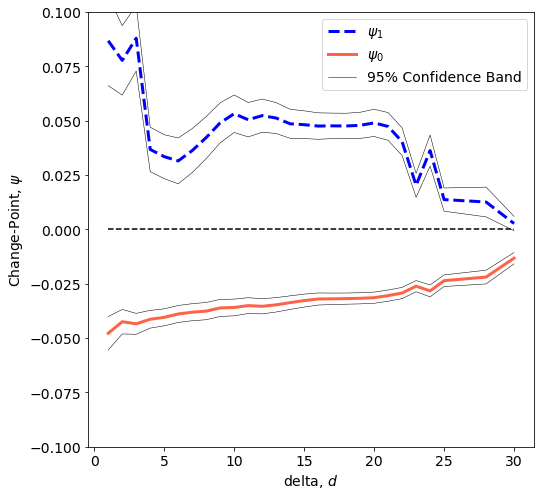

In [37]:
#Plot 95% Confidence Bands

plt.figure(figsize=(8,8))
plt.ylim(-0.1,0.1)
plt.plot([1, 30], [0, 0], color='black', linestyle='dashed')
plt.plot(piecewiseoutputdf['breakpoint2'], '--', color='blue', lw=3, label=r'$\psi_1$')
plt.plot(piecewiseoutputdf['breakpoint1'], '-', color='tomato', lw=3, label=r'$\psi_0$')
plt.plot(piecewiseoutputdf['breakpoint1c025'], '-', color='black', lw=0.5, label='95% Confidence Band')
plt.plot(piecewiseoutputdf['breakpoint1c975'], '-', color='black', lw=0.5)

plt.plot(piecewiseoutputdf['breakpoint2c025'], '-', color='black', lw=0.5)
plt.plot(piecewiseoutputdf['breakpoint2c975'], '-', color='black', lw=0.5)
plt.xlabel(r'delta, $d$',size=14)
plt.ylabel(r'Change-Point, $\psi$',size=14)
plt.tick_params(labelsize=14)
plt.legend(fontsize=14)
plt.savefig('figpltpiecewisethresholdsall',transparent=True, bbox_inches='tight')

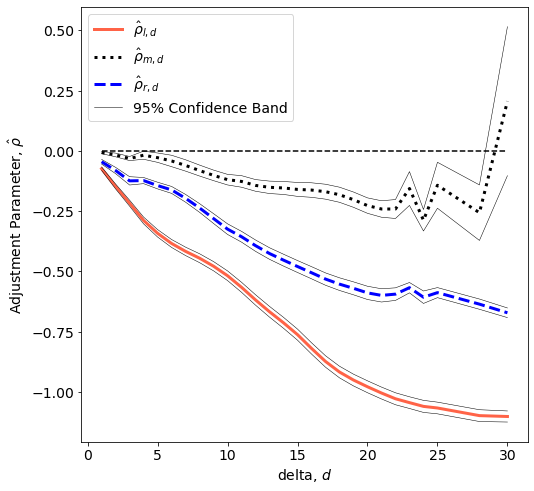

In [39]:
#Plot 95% Confidence Bands

plt.figure(figsize=(8,8))
#plt.ylim(-1.25,0.25)
plt.plot([1, 30], [0, 0], color='black', linestyle='dashed')
plt.plot(piecewiseoutputdf['alpha1'], '-', color='tomato', lw=3, label=r'$\hat{\rho}_{l,d}$')
plt.plot(piecewiseoutputdf['alpha2'], ':', color='black', lw=3, label=r'$\hat{\rho}_{m,d}$')
plt.plot(piecewiseoutputdf['alpha3'], '--', color='blue', lw=3, label=r'$\hat{\rho}_{r,d}$')

plt.plot(piecewiseoutputdf['alpha1c025'], '-', color='black', lw=0.5, label='95% Confidence Band')
plt.plot(piecewiseoutputdf['alpha1c975'], '-', color='black', lw=0.5)

plt.plot(piecewiseoutputdf['alpha2c025'], '-', color='black', lw=0.5)
plt.plot(piecewiseoutputdf['alpha2c975'], '-', color='black', lw=0.5)

plt.plot(piecewiseoutputdf['alpha3c025'], '-', color='black', lw=0.5)
plt.plot(piecewiseoutputdf['alpha3c975'], '-', color='black', lw=0.5)

plt.xlabel(r'delta, $d$',size=14)
plt.ylabel(r'Adjustment Parameter, $\hat{\rho}$',size=14)
plt.tick_params(labelsize=14)
plt.legend(fontsize=14)
plt.savefig('figpltpiecewisealphasall',transparent=True, bbox_inches='tight')